# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#Set up link for api call
link = "http://api.openweathermap.org/data/2.5/weather?"
link = f"{link}appid={api_key}&units=metric&q="

#Set up lists to hold data
location = []
clouds = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temp = []
wind = []
#set organisational variables
count = 0
current_set = 1

#collect data and store in lists
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
    try:
        data = requests.get(link+city).json()
        location.append(data["name"])
        clouds.append(data["clouds"]["all"])
        country.append(data["sys"]["country"])
        date.append(datetime.date.fromtimestamp(data["dt"]))
        humidity.append(data["main"]["humidity"])
        lats.append(data["coord"]["lat"])
        lngs.append(data["coord"]["lon"])
        max_temp.append(data["main"]["temp_max"])
        wind.append(data["wind"]["speed"])
        if count > 49:
            count = 1
            current_set += 1
        else:
            count += 1
        print(f"Processing record {count} of set {current_set} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | port alfred
Processing record 2 of set 1 | misratah
Processing record 3 of set 1 | saint-georges
Processing record 4 of set 1 | qaanaaq
Processing record 5 of set 1 | wanning
Processing record 6 of set 1 | tuktoyaktuk
Processing record 7 of set 1 | kodiak
Processing record 8 of set 1 | hilo
Processing record 9 of set 1 | geelong
Processing record 10 of set 1 | goksun
Processing record 11 of set 1 | puerto ayora
Processing record 12 of set 1 | verkhnyaya inta
Processing record 13 of set 1 | clyde river
Processing record 14 of set 1 | tiksi
Processing record 15 of set 1 | chuy
Processing record 16 of set 1 | warrnambool
Processing record 17 of set 1 | namibe
Processing record 18 of set 1 | castro
Processing record 19 of set 1 | rikitea
Processing record 20 of set 1 | saldanha
Processing record 21 of set 1 | nome
Processing record 22 of set 1 | busselton
Processing record 23 of set 1 | basco
Processing r

Processing record 37 of set 4 | koumac
Processing record 38 of set 4 | isabela
Processing record 39 of set 4 | bure
Processing record 40 of set 4 | zhangjiakou
Processing record 41 of set 4 | norman wells
City not found. Skipping...
Processing record 42 of set 4 | nemuro
Processing record 43 of set 4 | sao miguel do araguaia
Processing record 44 of set 4 | bamako
Processing record 45 of set 4 | vila velha
Processing record 46 of set 4 | nyurba
Processing record 47 of set 4 | mar del plata
City not found. Skipping...
Processing record 48 of set 4 | carnarvon
Processing record 49 of set 4 | shitanjing
Processing record 50 of set 4 | magdagachi
Processing record 1 of set 5 | caconda
Processing record 2 of set 5 | hami
Processing record 3 of set 5 | periyapatti
Processing record 4 of set 5 | magadan
City not found. Skipping...
Processing record 5 of set 5 | saint anthony
City not found. Skipping...
Processing record 6 of set 5 | los llanos de aridane
Processing record 7 of set 5 | mahanoro

Processing record 20 of set 8 | salalah
Processing record 21 of set 8 | rio gallegos
Processing record 22 of set 8 | grindavik
Processing record 23 of set 8 | cedar city
Processing record 24 of set 8 | te anau
Processing record 25 of set 8 | ayan
Processing record 26 of set 8 | kaduy
Processing record 27 of set 8 | plettenberg
Processing record 28 of set 8 | avare
Processing record 29 of set 8 | darnah
Processing record 30 of set 8 | belaya gora
Processing record 31 of set 8 | qiyang
Processing record 32 of set 8 | urziceni
Processing record 33 of set 8 | manadhoo
Processing record 34 of set 8 | harper
Processing record 35 of set 8 | mae sot
Processing record 36 of set 8 | vila franca do campo
Processing record 37 of set 8 | mehamn
Processing record 38 of set 8 | shingu
Processing record 39 of set 8 | kawalu
Processing record 40 of set 8 | shenjiamen
Processing record 41 of set 8 | hyeres
Processing record 42 of set 8 | carmen de carupa
City not found. Skipping...
Processing record 43 

Processing record 9 of set 12 | la palma
Processing record 10 of set 12 | ahipara
Processing record 11 of set 12 | gigmoto
Processing record 12 of set 12 | ulcinj
Processing record 13 of set 12 | merauke
City not found. Skipping...
Processing record 14 of set 12 | nivala
Processing record 15 of set 12 | nyrob
Processing record 16 of set 12 | san jose
Processing record 17 of set 12 | ruteng
------------------------------
Data Retrieval Complete
------------------------------


In [21]:
#create dictionary
df = {
    "City": location,
    "Clouds": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lats,
    "Longitude": lngs,
    "Max Temperature": max_temp,
    "Wind Speed": wind
}
#create dataframe
df = pd.DataFrame(df)
df.count()

City               567
Clouds             567
Country            567
Date               567
Humidity           567
Latitude           567
Longitude          567
Max Temperature    567
Wind Speed         567
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
df.to_csv("../output_data/weather_data.csv")
df.head()

,City,Clouds,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Port Alfred,62,ZA,2019-09-30,85,-33.59,26.89,15.00,2.68
1,Misratah,0,LY,2019-09-30,60,32.38,15.09,24.95,1.87
2,Saint-Georges,45,CA,2019-09-30,49,46.12,-70.67,13.89,1.21
3,Qaanaaq,100,GL,2019-09-30,95,77.48,-69.36,0.25,4.58
4,Wanning,40,AT,2019-09-30,62,48.64,13.53,14.00,3.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

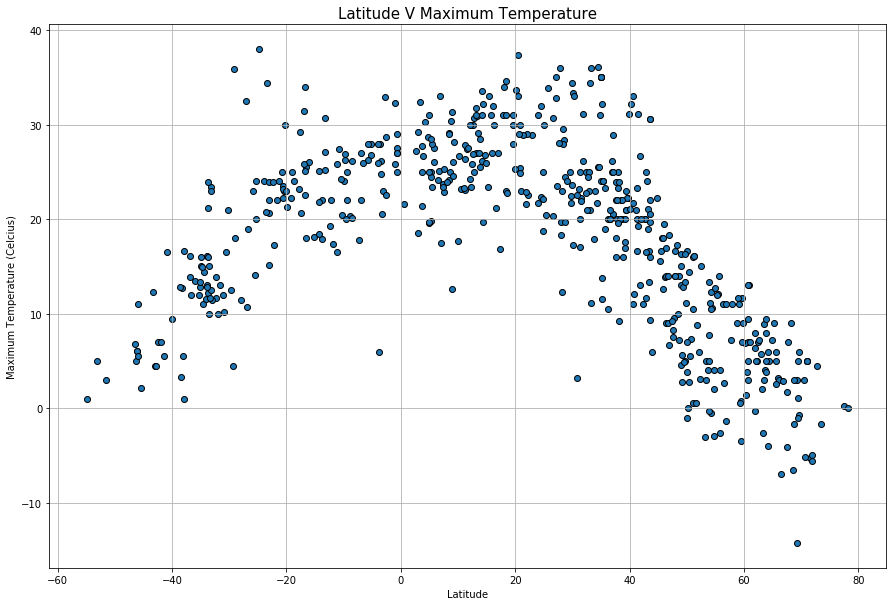

In [24]:

#create a plot based on latitude and max temp
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Max Temperature"], edgecolors="black")
#label graph
plt.title("Latitude V Maximum Temperature", size=15)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.grid()
#save as png
plt.savefig("../output_data/temp_scatter")

#### Latitude vs. Humidity Plot

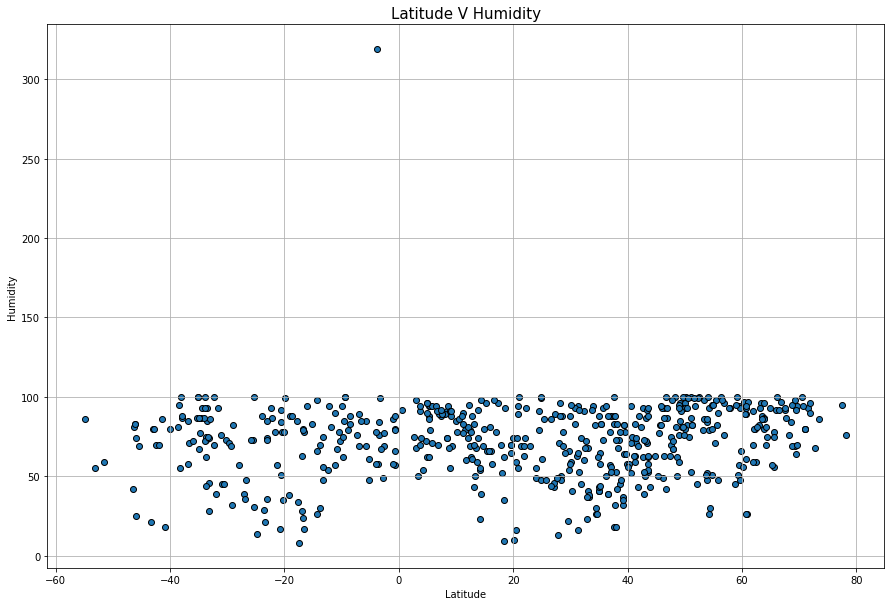

In [26]:
#create a plot based on latitude and humidity
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Humidity"], edgecolors="black")
#label graph
plt.title("Latitude V Humidity", size=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
#save as png
plt.savefig("../output_data/humidity_scatter")

#### Latitude vs. Cloudiness Plot

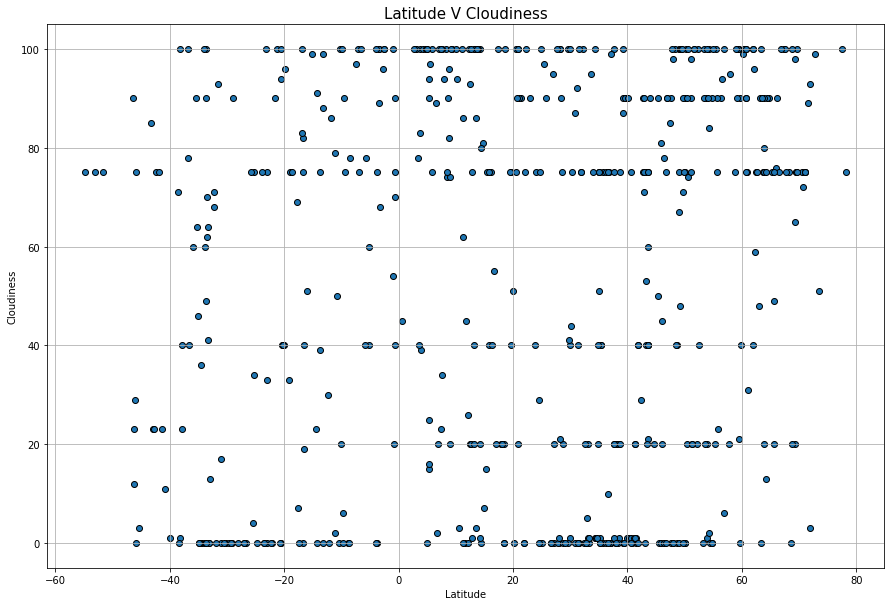

In [27]:
#create a plot based on latitude and humidity
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Clouds"], edgecolors="black")
#label graph
plt.title("Latitude V Cloudiness", size=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
#save as png
plt.savefig("../output_data/cloudiness_scatter")

#### Latitude vs. Wind Speed Plot

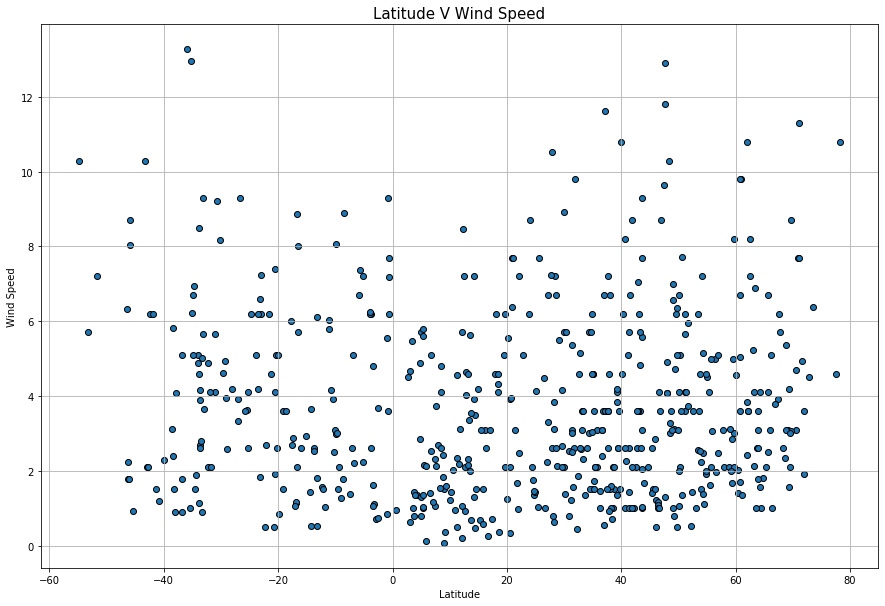

In [28]:
#create a plot based on latitude and humidity
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Wind Speed"], edgecolors="black")
#label graph
plt.title("Latitude V Wind Speed", size=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
#save as png
plt.savefig("../output_data/wins_speed_scatter")